In [1]:
from fastbook import *
from fastai.vision.widgets import *
path = Path('images/species_train')

In [2]:
fns = get_image_files(path)
fns

(#34772) [Path('images/species_train/prionailurus_rubiginosus/144317292_a.jpg'),Path('images/species_train/prionailurus_rubiginosus/121606170_a.jpg'),Path('images/species_train/prionailurus_rubiginosus/41371624_a.jpg'),Path('images/species_train/prionailurus_rubiginosus/14003737_a.jpg'),Path('images/species_train/prionailurus_rubiginosus/140909714_a.jpg'),Path('images/species_train/leopardus_emiliae/91746814_a.jpg'),Path('images/species_train/leopardus_emiliae/151830748_a.jpg'),Path('images/species_train/leopardus_emiliae/145149965_a.jpg'),Path('images/species_train/leopardus_emiliae/101903849_a.jpg'),Path('images/species_train/leopardus_emiliae/99927748_a.jpg')...]

In [3]:
import os

directory_list = list()
for root, dirs, files in os.walk(path, topdown=False):
    for name in dirs:
        directory_list.append(os.path.join(root, name).split('/')[-1])

print(directory_list)

['prionailurus_rubiginosus_rubiginosus', 'prionailurus_rubiginosus_phillipsi', 'leopardus_pardalis_pardalis', 'leopardus_pardalis_mitis', 'neofelis_diardi_borneensis', 'caracal_aurata_aurata', 'catopuma_temminckii_moormensis', 'lynx_lynx_lynx', 'lynx_lynx_carpathicus', 'lynx_lynx_isabellinus', 'lynx_lynx_wrangeli', 'lynx_lynx_dinniki', 'lynx_rufus_escuinapae', 'lynx_rufus_fasciatus', 'lynx_rufus_rufus', '.ipynb_checkpoints', '.ipynb_checkpoints', 'panthera_pardus_pardus', 'panthera_pardus_tulliana', 'panthera_pardus_melas', 'panthera_pardus_kotiya', 'panthera_pardus_fusca', 'panthera_pardus_delacouri', 'prionailurus_viverrinus_viverrinus', 'caracal_caracal_schmitzi', 'caracal_caracal_nubicus', 'caracal_caracal_caracal', 'panthera_leo_melanochaita', 'panthera_leo_leo', 'felis_lybica_cafra', 'felis_lybica_ornata', 'felis_lybica_lybica', 'puma_concolor_couguar', 'puma_concolor_concolor', 'otocolobus_manul_nigripectus', 'felis_silvestris_silvestris', 'felis_silvestris_caucasica', 'prionail

In [4]:
wildlife = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [5]:
dls = wildlife.dataloaders(path)

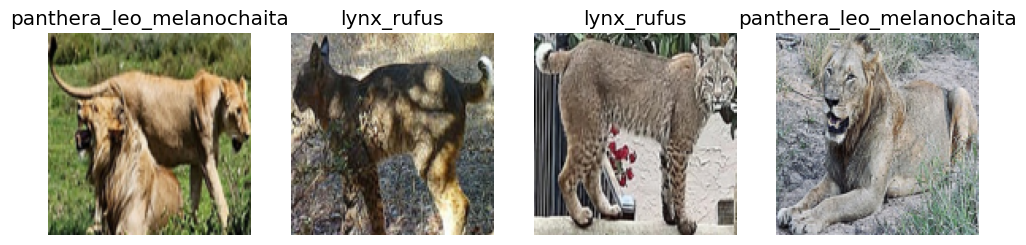

In [6]:


wildlife = wildlife.new(item_tfms=Resize(128, ResizeMethod.Squish),batch_tfms=aug_transforms(mult=2))
dls = wildlife.dataloaders(path, bs=40)
dls.valid.show_batch(max_n=4, nrows=1)
     


In [7]:


learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(9)
     


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.579515,1.205471,0.283722,02:22


epoch,train_loss,valid_loss,error_rate,time
0,1.078162,0.861046,0.217573,03:26
1,0.995046,0.787584,0.206212,03:34
2,0.921422,0.711290,0.179465,03:05
3,0.853845,0.648752,0.169687,03:02
4,0.718416,0.621685,0.162209,03:34
5,0.620085,0.582993,0.154587,03:19
6,0.594079,0.562568,0.148835,03:26
7,0.513315,0.550312,0.142508,03:19
8,0.520043,0.546359,0.142220,03:20


In [41]:
btn_upload = SimpleNamespace(data = ['images/species_validate/loxodonta_cyclotis/33814732_a.jpg'])
img = PILImage.create(btn_upload.data[-1])


In [42]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [43]:


pred,pred_idx,probs = learn.predict(img)

In [44]:
print(pred)

loxodonta_cyclotis


In [24]:
learn.export()